# **df5 - Preprocessing**

# **Customer Segmentation Dataset (Unsupervised Learning)**

In [ ]:
import pandas as pd
df5=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/df5-customer_segmentation_dataset.csv')
df5.head()

,Unnamed: 0,Customer_ID,Age,Income,Location,Number_of_Active_Policies,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,40039.59,Johnberg,3,12999.70,2,0
1,1,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,61,153320.19,New Roberttown,5,5260.00,6,0
2,2,815ef6d1-3b8f-4a18-b7f8-a88b17fc695a,19,36865.14,New Jamesside,2,25762.41,0,1
3,3,96da1dac-72ff-4d2a-b86e-cbe06b65a6a4,63,136979.20,Lisatown,5,21556.47,7,2
4,4,b2b9437a-28df-4ec4-8e4a-2bbdc241330b,69,176474.06,Petersonberg,2,35208.83,5,2


In [ ]:
df5.drop(['Unnamed: 0', 'Location', 'Customer_ID'],axis=1,inplace=True)
#df5.drop(['Location'],axis=1,inplace=True)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Income                     1000 non-null   float64
 2   Number_of_Active_Policies  1000 non-null   int64  
 3   Total_Premium_Paid         1000 non-null   float64
 4   Claim_Frequency            1000 non-null   int64  
 5   Policy_Upgrades            1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [ ]:
import joblib
df5.to_csv(r'/content/drive/MyDrive/Captsone project/Data/5_Unsupervised_customer_data.csv')

# SCALING



In [ ]:
df5.isnull().sum()

,0
Age,0
Income,0
Number_of_Active_Policies,0
Total_Premium_Paid,0
Claim_Frequency,0
Policy_Upgrades,0


In [ ]:
#Corrected Code for Scaling Both Columns at Once

from sklearn.preprocessing import StandardScaler
import joblib
# Select columns to scale
columns_to_scale = ["Income", "Total_Premium_Paid"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform both columns at once
df5[columns_to_scale] = scaler.fit_transform(df5[columns_to_scale])

In [ ]:
# Save the scaler for future use
import joblib
joblib.dump(scaler, r'/content/drive/MyDrive/Captsone project/models/5_scaler_unsupervised.pkl')

['/content/drive/MyDrive/Captsone project/models/5_scaler_unsupervised.pkl']

In [ ]:
df5.head()

,Age,Income,Number_of_Active_Policies,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,58,-1.347477,3,-0.861332,2,0
1,61,0.835905,5,-1.408809,6,0
2,19,-1.408661,2,0.041455,0,1
3,63,0.520947,5,-0.256058,7,2
4,69,1.282176,2,0.709659,5,2


DIMENSIONALITY REDUCTION WITH PCA

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

PCA works with numerical data

It relies on variance and Euclidean distance, which don't make sense for categorical values.

Categorical values (even after Label Encoding) don't have a meaningful numerical relationship.(so only we have changed the multiclass categorical to binary categorica)

In [ ]:
from sklearn.decomposition import PCA

Choosing the right number of principal components (n_components) in PCA depends on how much variance you want to retain. Here’s how to decide:

📌 1. Check Explained Variance (Scree Plot Method)

A Scree Plot shows how much variance each principal component captures.

In [ ]:
df5_filtered = df5.iloc[:, :]  # Keeps all columns except the first one
print(df5_filtered.head())

   Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
0   58 -1.347477                          3           -0.861332   
1   61  0.835905                          5           -1.408809   
2   19 -1.408661                          2            0.041455   
3   63  0.520947                          5           -0.256058   
4   69  1.282176                          2            0.709659   

   Claim_Frequency  Policy_Upgrades  
0                2                0  
1                6                0  
2                0                1  
3                7                2  
4                5                2  


you should select n_components based on the "elbow point"

From the graph:

The cumulative explained variance rapidly increases up to 2 components (≈ 0.994).

After 3 components, the increase slows down, and by 4-5 components, it is nearly 1.

Optimal Choice:

If you want minimal components while preserving most variance, choose n_components = 2 or 3.

If you want to keep almost 100% variance, choose n_components = 4 or 5.

Recommendation: **n_components = 3** seems like a good balance based on the diminishing gain pattern.

In [ ]:
pca = PCA(n_components=3)
PCA_df5 = pd.DataFrame(pca.fit_transform(df5_filtered), columns=(["col1","col2", "col3"]))

In [ ]:
import joblib
PCA_df5.to_csv(r'/content/drive/MyDrive/Captsone project/Data/5_pca_unsupervised_data.csv')

In [ ]:
joblib.dump(pca,r'/content/drive/MyDrive/Captsone project/models/5_PCA_unsupervised.pkl')

['/content/drive/MyDrive/Captsone project/models/5_PCA_unsupervised.pkl']

In [ ]:
PCA_df5=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/5_pca_unsupervised_data.csv')
del PCA_df5['Unnamed: 0']

In [ ]:
PCA_df5.head()

,col1,col2,col3
0,8.494422,-3.134971,-0.000267
1,11.529703,0.760016,2.087176
2,-30.516246,-4.787262,-1.114987
3,13.545968,1.749012,1.978114
4,19.531646,-0.279362,-1.079342


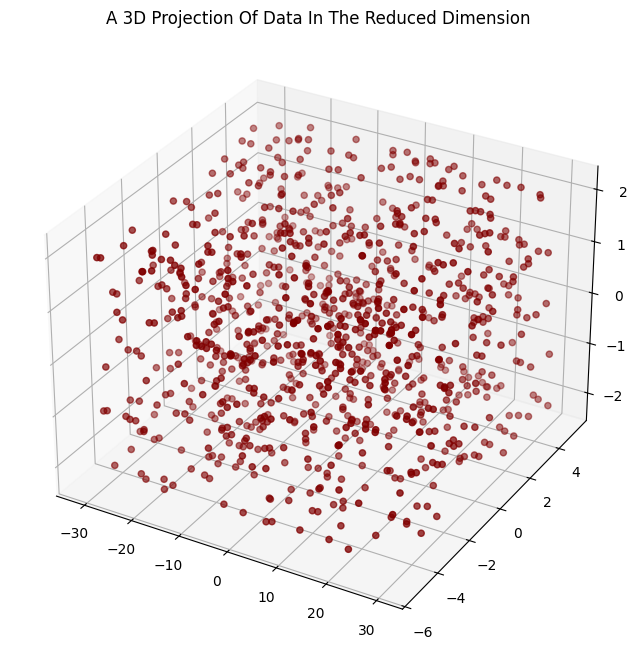

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df5["col1"]
y =PCA_df5["col2"]
z =PCA_df5["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# CLUSTERING

# K-MEANS

Elbow Method to determine the number of clusters to be formed

In [ ]:
!pip install yellowbrick

Elbow Method to determine the number of clusters to be formed:


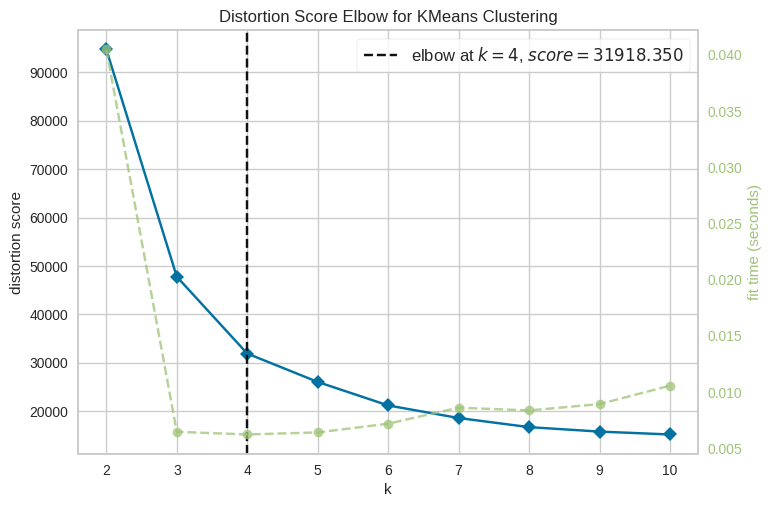

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df5)
Elbow_M.show()

elbow at k=4

K-Means Clustering on PCA Data (n_clusters=4)

In [ ]:
from sklearn.cluster import KMeans
pca_features = PCA_df5.iloc[:, :3]  # Assuming the first 3 columns are PC1, PC2, PC3

# Apply K-Means with k=3
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)  # Assign cluster labels

# Add cluster labels to DataFrame
PCA_df5['Cluster4'] = clusters

Saving the K-means model

In [ ]:
import joblib
joblib.dump(kmeans,r'/content/drive/MyDrive/Captsone project/models/5_Kmeans_Unsupervised.pkl')

['/content/drive/MyDrive/Captsone project/models/5_Kmeans_Unsupervised.pkl']

In [ ]:
PCA_df5['Cluster4'].value_counts()

,count
Cluster4,
1,258
3,257
0,249
2,236


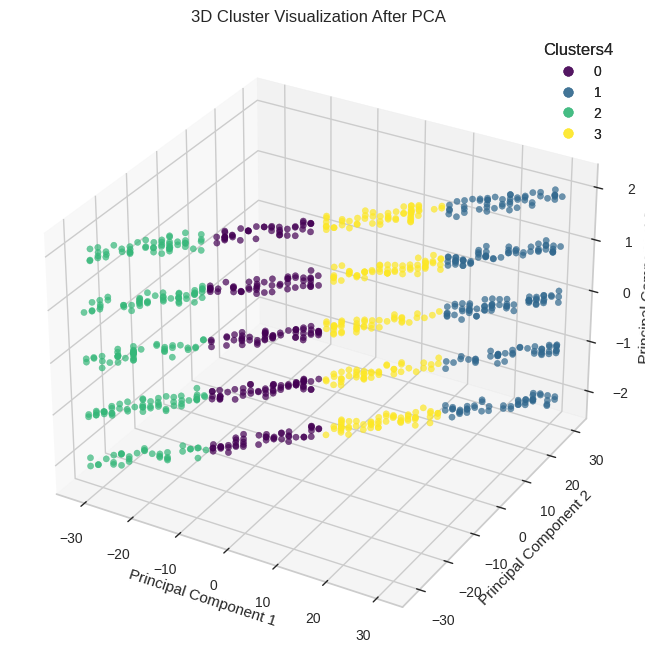

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract PCA components
x = PCA_df5["col1"]
y = PCA_df5["col1"]
z = PCA_df5["col3"]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(x, y, z, c=PCA_df5["Cluster4"], cmap="viridis", marker="o", alpha=0.7)

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Cluster Visualization After PCA")

# Add legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters4")
ax.add_artist(legend)

plt.show()

Each point represents a customer in the dataset.

Colors indicate different clusters.

You can interpret clusters based on their characteristics


Evaluate Clustering with **Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score
pca_features = PCA_df5.iloc[:, :3]  # Assuming the first 3 columns are PC1, PC2, PC3

# Compute Silhouette Score
silhouette_avg = silhouette_score(pca_features, clusters)
print(f"Silhouette Score for k=3: {silhouette_avg:.4f}")

Silhouette Score for k=3: 0.4664


Interpret Results Silhouette Score > 0.5 → Clusters are well-separated. ✅

Silhouette Score between 0.3 - 0.5 → Some overlap between clusters. ⚠️

Silhouette Score < 0.3 → Poor clustering. ❌

silhouette score for k-means (n_Components=4) is good

#  Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
PCA_df5.head()

,col1,col2,col3,Cluster4
0,8.494422,-3.134971,-0.000267,3
1,11.529703,0.760016,2.087176,3
2,-30.516246,-4.787262,-1.114987,2
3,13.545968,1.749012,1.978114,3
4,19.531646,-0.279362,-1.079342,1


In [ ]:
pca_features = PCA_df5.iloc[:, :3]  # Assuming the first 3 columns are PC1, PC2, PC3
# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Adjust clusters as needed
df5['Cluster_agg'] = agglo.fit_predict(pca_features)

Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_features, df5['Cluster_agg'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.43676955489329533


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-1095936101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df5['Cluster_agg'], palette= pal)


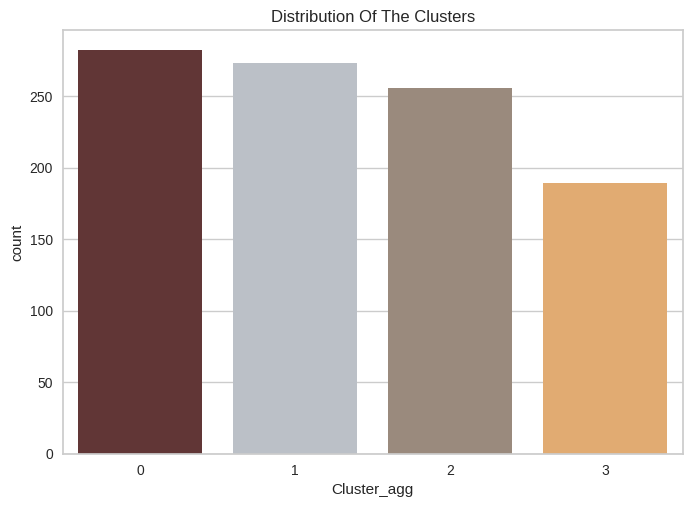

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df5['Cluster_agg'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
✅ It does not require specifying the number of clusters (k). ✅ It can identify outliers as noise points. ✅ It works well for non-spherical clusters and uneven densities.

1️⃣ Choosing Parameters for DBSCAN DBSCAN has two key parameters:

eps: Defines how close points should be to be considered part of the same cluster.

min_samples: The minimum number of points needed to form a dense region.

To determine the best eps, use the k-distance plot:

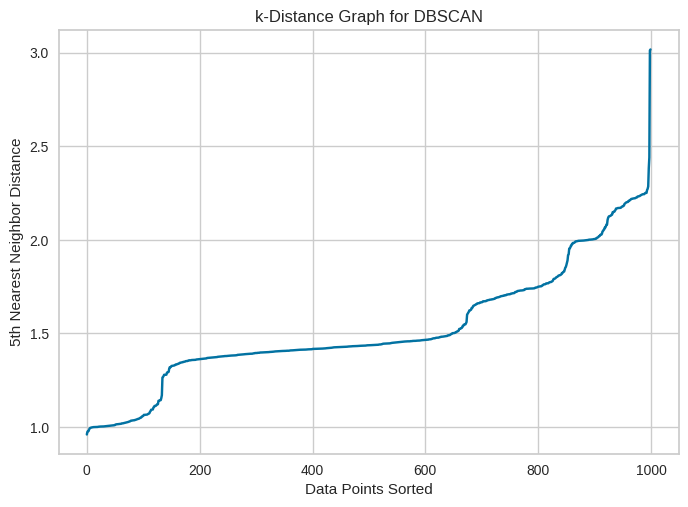

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
pca_features = PCA_df5.iloc[:, :3]  # Assuming the first 3 columns are PC1, PC2, PC3

# Fit Nearest Neighbors model
neigh = NearestNeighbors(n_neighbors=5)  # 5 is a rule of thumb
neigh.fit(pca_features)
distances, _ = neigh.kneighbors(pca_features)

# Sort and plot the distances of the 5th nearest neighbor
distances = np.sort(distances[:, 4])  # 4 because index starts at 0
plt.plot(distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("k-Distance Graph for DBSCAN")
plt.show()

📌 Choose eps where the curve has a steep increase (elbow point). eps=0.7

In [ ]:
from sklearn.cluster import DBSCAN

# Set `eps` based on the k-distance graph
dbscan = DBSCAN(eps=0.7, min_samples=5)  # Adjust values based on data

# Fit and predict cluster labels
labels = dbscan.fit_predict(pca_features)

# Add cluster labels to dataframe
pca_features["DBSCAN_Cluster"] = labels

3️⃣ Visualizing DBSCAN Clusters (3D PCA Projection)

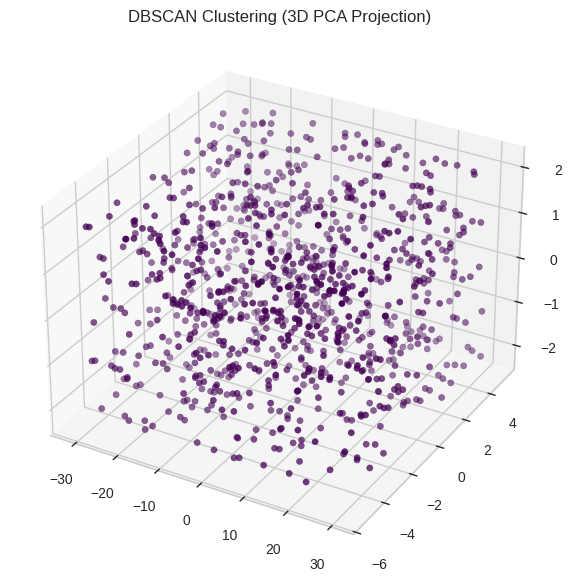

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
ax.scatter(pca_features["col1"], pca_features["col2"], pca_features["col3"],
           c=labels, cmap='viridis', marker='o')

ax.set_title("DBSCAN Clustering (3D PCA Projection)")
plt.show()

In [ ]:
# Compute Silhouette Score (only if multiple clusters exist)
unique_clusters = set( pca_features['DBSCAN_Cluster']) - {  1}  # Exclude noise (-1)

if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(pca_features, pca_features['DBSCAN_Cluster'])
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score cannot be computed as there is only one cluster or excessive noise.")


Silhouette Score cannot be computed as there is only one cluster or excessive noise.


# FUTURE PREDICTION

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load the saved models
scaler = joblib.load(r"/content/drive/MyDrive/Captsone project/models/5_scaler_unsupervised.pkl")  # StandardScaler for selected columns
pca = joblib.load(r"/content/drive/MyDrive/Captsone project/models/5_PCA_unsupervised.pkl")  # PCA model
kmeans = joblib.load(r"/content/drive/MyDrive/Captsone project/models/5_Kmeans_Unsupervised.pkl")  # Trained KMeans model

# Define function for future prediction
def predict_customer_cluster(age, income, Number_of_Active_Policies, total_premium_paid, claim_frequency, policy_upgrades):
    # Create DataFrame for new input
    new_data = pd.DataFrame([[age, income, Number_of_Active_Policies, total_premium_paid, claim_frequency, policy_upgrades]],
                            columns=["Age", "Income", "Number_of_Active_Policies", "Total_Premium_Paid", "Claim_Frequency", "Policy_Upgrades"])

    # Scale only the necessary columns (Annual_Income & Total_Premium_Paid)
    new_data[["Income", "Total_Premium_Paid"]] = scaler.transform(new_data[["Income", "Total_Premium_Paid"]])

    # Apply PCA transformation
    new_data_pca = pca.transform(new_data)

    # Predict cluster using KMeans
    cluster_label = kmeans.predict(new_data_pca)[0]

    return cluster_label

# Example Prediction
predicted_cluster = predict_customer_cluster(56, 106585.67, 4, 6382.37, 2, 3)
print(f"Predicted Customer Cluster: {predicted_cluster}")


Predicted Customer Cluster: 3


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
